In [1]:
import requests
import PyPDF2
import os
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

#Downloading the pdf file
file_url = "https://www.brookings.edu/wp-content/uploads/2020/09/UNESCO-Kim-Care_Africa-ministudy-2020.pdf"

# Get the actual filename from the URL
filename = os.path.basename(file_url)

# Find the position of '.pdf' in the filename and keep only the characters before that position
if '.pdf' in filename:
    filename = filename[:filename.index('.pdf') + 4]

#Create the pdf file locally
r = requests.get(file_url, stream = True)

with open(filename,"wb") as pdf:
    for chunk in r.iter_content(chunk_size=1024):
        '''
        writing one chunk as a time to pdf file
        '''
        if chunk:
            pdf.write(chunk)

# Open PDF file
pdffileObj = open(filename, 'rb')

# Create PDF reader object
pdfReader = PyPDF2.PdfReader(pdffileObj)

# Get the total number of pages in the PDF
num_pages = len(pdfReader.pages)
print("Total number of pages:", num_pages)

# Initialize an empty variable to store the extracted text
all_text = ""

# Loop through each page and extract text
for page_num in range(num_pages):
    # Create a page object for the current page
    pageObj = pdfReader.pages[page_num]
    
    # Extract text from the page
    text = pageObj.extract_text()
    
    # Append the extracted text to the 'all_text' variable
    all_text += text

# Print the combined text from all pages
print("Combined Text:", all_text)

# Close the PDF file object
pdffileObj.close()

Total number of pages: 64
Combined Text: Capturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
United Nations
Educational, Scientiﬁc and
Cultural Organization
Dakar
Regional Office
Capturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesCapturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
Helyn Kim and Esther CareCapturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesEducation 
Sector
United Nations
(GXFDWLRQDO6FLHQWL¿FDQG
Cultural OrganizationThe Global Education 2030 Agenda
UNESCO, as the United Nations’ specialized 
agency for education, is entrusted to lead and 
coordinate the Education 2030 Agenda, which is part of a global movement to eradicate poverty through 17 Sustainable Development Goals by 
2030. Education, essential to achieve all of these 
goals, has its own dedicated Goal 4, which aims to “ensure 

In [2]:
all_text.splitlines()
sentiment = all_text.split()
#print(sentiment)
print(all_text)

Capturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
United Nations
Educational, Scientiﬁc and
Cultural Organization
Dakar
Regional Office
Capturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesCapturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
Helyn Kim and Esther CareCapturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesEducation 
Sector
United Nations
(GXFDWLRQDO6FLHQWL¿FDQG
Cultural OrganizationThe Global Education 2030 Agenda
UNESCO, as the United Nations’ specialized 
agency for education, is entrusted to lead and 
coordinate the Education 2030 Agenda, which is part of a global movement to eradicate poverty through 17 Sustainable Development Goals by 
2030. Education, essential to achieve all of these 
goals, has its own dedicated Goal 4, which aims to “ensure inclusive and equitable quality education

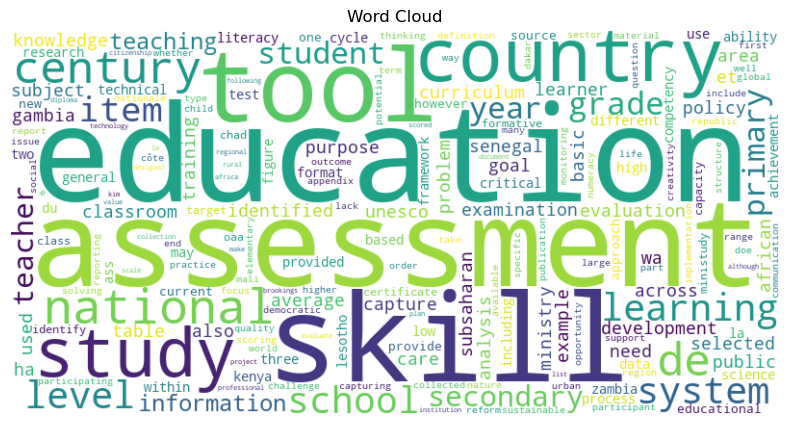

In [3]:
import nltk

#nltk.download('omw-1.4')

import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Sample list of words
word_list = sentiment

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Create a translation table to remove punctuation
translator = str.maketrans('', '', string.punctuation)

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Count the occurrence of each relevant word (ignoring capitalization, punctuation, and numbers)
word_counts = {}
for word in word_list:
    # Convert the word to lowercase for case-insensitive comparison
    word = word.lower()

    # Remove punctuation from the word
    word = word.translate(translator)

    # Lemmatize the word to get its base form (singular)
    word = lemmatizer.lemmatize(word)

    # Check if the lowercase word is in the stop words set and if it contains only alphabetic characters
    if word not in stop_words and word.isalpha():
        word_counts[word] = word_counts.get(word, 0) + 1

# Prepare data for plotting
words = list(word_counts.keys())
counts = list(word_counts.values())

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

# Prepare data for word cloud
wordcloud_data = dict(zip(words, counts))

# Create word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


In [4]:
#Open and Read all Training Data

with open ('trainset/Datatype/ArtisticProcess.txt', "r") as f:
    ArtisticProcess = f.read().splitlines()

with open ('trainset/Datatype/BestSellingBooks.txt', "r") as f:
    BestSellingBooks = f.read().splitlines()

with open ('trainset/Datatype/BlueprintsToolkit.txt', "r") as f:
    BlueprintsToolkit = f.read().splitlines()

with open ('trainset/Datatype/BusinessModels.txt', "r") as f:
    BusinessModels = f.read().splitlines()

with open ('trainset/Datatype/DiscoveryInvention.txt', "r") as f:
    DiscoveryInvention = f.read().splitlines()

with open ('trainset/Datatype/ExpertAdviceRecommentations.txt', "r") as f:
    ExpertAdviceRecommentations = f.read().splitlines()

with open ('trainset/Datatype/GovernanceStructure.txt', "r") as f:
    GovernanceStructure = f.read().splitlines()

with open ('trainset/Datatype/HealthRegimes.txt', "r") as f:
    HealthRegimes = f.read().splitlines()

with open ('trainset/Datatype/IndustryStandards.txt', "r") as f:
    IndustryStandards = f.read().splitlines()

with open ('trainset/Datatype/Lifestyle.txt', "r") as f:
    Lifestyle = f.read().splitlines()

with open ('trainset/Datatype/OperationsManual.txt', "r") as f:
    OperationsManual = f.read().splitlines()

with open ('trainset/Datatype/PhilosopyValues.txt', "r") as f:
    PhilosopyValues = f.read().splitlines()

with open ('trainset/Datatype/ProductionMethod.txt', "r") as f:
    ProductionMethod = f.read().splitlines()

with open ('trainset/Datatype/Regulations.txt', "r") as f:
    Regulations = f.read().splitlines()

with open ('trainset/Datatype/SolutionsPlaybooks.txt', "r") as f:
    SolutionsPlaybooks = f.read().splitlines()

with open ('trainset/Datatype/Strategies.txt', "r") as f:
    Strategies = f.read().splitlines()


In [5]:
data = {}
data["Artistic Process"] = ArtisticProcess
data["Best Selling Books"] = BestSellingBooks
data["Blueprints Toolkit"] = BlueprintsToolkit
data["Business Models"] = BusinessModels
data["Discovery Invention"] = DiscoveryInvention
data["Expert Advice Recommentations"] = ExpertAdviceRecommentations
data["Governance Structure"] = GovernanceStructure
data["Health Regimes"] = HealthRegimes
data["Industry Standards"] = IndustryStandards
data["Lifestyle"] = Lifestyle
data["Operations Manual"] = OperationsManual
data["Philosopy Values"] = PhilosopyValues
data["Production Method"] = ProductionMethod
data["Regulations"] = Regulations
data["Solutions Playbooks"] = SolutionsPlaybooks
data["Strategies"] = Strategies
data

{'Artistic Process': ['Sketching is an initial artistic process that involves creating rough drawings to explore ideas, composition, and form.',
  'Sculpting is a hands-on artistic process that involves shaping and manipulating materials like clay, stone, or metal to create three-dimensional artworks.',
  'Collage is an artistic process that involves assembling different materials such as paper, photographs, and fabric to create a cohesive visual composition.',
  'Printmaking is a process that involves creating multiple copies of an image or design using techniques like etching, engraving, or screen printing.',
  'Painting is a process of applying pigments or colors to a surface, such as canvas or paper, using brushes, knives, or other tools.',
  'Photography is an artistic process that involves capturing and creating images using cameras, lenses, and various techniques in composition and lighting.',
  'Ceramics is an artistic process that involves shaping and firing clay to create fun

In [6]:
import spacy
import classy_classification

#Apply Classy Model
nlp = spacy.blank("en")
nlp.add_pipe(
    "text_categorizer", 
    config={
        "data": data, 
        "model": "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
        "device": "cpu"
    }
) 

print(nlp("Data Type Classifications")._.cats)

{'Artistic Process': 0.012832060329259135, 'Best Selling Books': 0.009548765498676615, 'Blueprints Toolkit': 0.16520404348309692, 'Business Models': 0.03245927506753985, 'Discovery Invention': 0.01187746493799621, 'Expert Advice Recommentations': 0.028715567479795565, 'Governance Structure': 0.014076592636173548, 'Health Regimes': 0.013883960693089564, 'Industry Standards': 0.5794341800101326, 'Lifestyle': 0.005406480004074918, 'Operations Manual': 0.015935428201952137, 'Philosopy Values': 0.008256021497981518, 'Production Method': 0.0158949940025447, 'Regulations': 0.06522614461165521, 'Solutions Playbooks': 0.011821096723599905, 'Strategies': 0.00942792482243145}


In [7]:
sentence_model = spacy.blank("en")
sentence_model.add_pipe("sentencizer")

In [8]:
segment_size = 100000  # Define the desired segment size

num_segments = len(all_text) // segment_size + 1  # Calculate the number of segments

final_data = []

for i in range(num_segments):
    start_idx = i * segment_size
    end_idx = (i + 1) * segment_size
    segment = all_text[start_idx:end_idx]

    sentences = sentence_model(segment)

    for sentence in sentences.sents:
        doc = nlp(sentence.text)
        final_data.append({"sentence": doc.text, "cats": doc._.cats})

In [9]:
#Show Sample score per Sentence
for item in final_data:
    print (item["sentence"])
    print ("Artistic Process",item["cats"]["Artistic Process"])
    print ("Best Selling Books",item["cats"]["Best Selling Books"])
    print ("Blueprints Toolkit",item["cats"]["Blueprints Toolkit"])
    print ("Business Models",item["cats"]["Business Models"])
    print ("Discovery Invention",item["cats"]["Discovery Invention"])
    print ("Expert Advice Recommentations",item["cats"]["Expert Advice Recommentations"])
    print ("Governance Structure",item["cats"]["Governance Structure"])
    print ("Health Regimes",item["cats"]["Health Regimes"])
    print ("Industry Standards",item["cats"]["Industry Standards"])
    print ("Lifestyle",item["cats"]["Lifestyle"])
    print ("Operations Manual",item["cats"]["Operations Manual"])
    print ("Philosopy Values",item["cats"]["Philosopy Values"])
    print ("Production Method",item["cats"]["Production Method"])
    print ("Regulations",item["cats"]["Regulations"])
    print ("Solutions Playbooks",item["cats"]["Solutions Playbooks"])
    print ("Strategies",item["cats"]["Strategies"])

Capturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
United Nations
Educational, Scientiﬁc and
Cultural Organization
Dakar
Regional Office
Capturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesCapturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
Helyn Kim and Esther CareCapturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesEducation 
Sector
United Nations
(GXFDWLRQDO6FLHQWL¿FDQG
Cultural OrganizationThe Global Education 2030 Agenda
UNESCO, as the United Nations’ specialized 
agency for education, is entrusted to lead and 
coordinate the Education 2030 Agenda, which is part of a global movement to eradicate poverty through 17 Sustainable Development Goals by 
2030.
Artistic Process 0.02700014422959821
Best Selling Books 0.06946977617570928
Blueprints Toolkit 0.044906451430311266
Business Models 0.021708420794

In [10]:
import pandas as pd
import os

# Extract the "sentence" and "cats" data from the final_data list, and trim spaces
sentences = [item["sentence"].strip() for item in final_data]
categories_data = [item["cats"] for item in final_data]

# Create the DataFrame with the "Sentence" column
df_cat = pd.DataFrame({"Sentence": sentences})

# Add the category columns to the DataFrame
category_columns = [
    "Artistic Process",
    "Best Selling Books",
    "Blueprints Toolkit",
    "Business Models",
    "Discovery Invention",
    "Expert Advice Recommentations",
    "Governance Structure",
    "Health Regimes",
    "Industry Standards",
    "Lifestyle",
    "Operations Manual",
    "Philosopy Values",
    "Production Method",
    "Regulations",
    "Solutions Playbooks",
    "Strategies"
]

for category in category_columns:
    df_cat[category] = [data[category] for data in categories_data]

# Convert the probability values to percentages and round to two decimal places
df_cat[category_columns] = (df_cat[category_columns] * 100).round(6)

# Add a new column with the category_column name that has the highest value
df_cat['Category_Tag'] = df_cat[category_columns].idxmax(axis=1)

# Add a new column for the Filename
df_cat['Filename'] = filename

# Print the final DataFrame
print(df_cat)

# Generate the CSV file path
csv_filename = os.path.join("dataset", "DataTypeClassification.csv")

# Create the 'dataset' directory if it doesn't exist
os.makedirs(os.path.dirname(csv_filename), exist_ok=True)

# Check if the CSV file already exists
if os.path.exists(csv_filename):
    # Load the existing CSV file into a DataFrame
    df_existing = pd.read_csv(csv_filename)
    # Assume df_cat is the new DataFrame you want to append
    # Append the new data to the existing DataFrame
    df_combined = pd.concat([df_existing, df_cat], ignore_index=True)
else:
    # If the CSV file doesn't exist, just save the new DataFrame directly
    df_combined = df_cat

# Save the combined DataFrame to the CSV file
df_combined.to_csv(csv_filename, index=False)

                                               Sentence  Artistic Process  \
0     Capturing 21st century skills\nAnalysis of ass...          2.700014   
1     Education, essential to achieve all of these \...          2.247978   
2     The Education 2030 Framework for Action provid...          1.035445   
3     UNESCO Education Sector\nEducation is UNESCO’s...          1.924119   
4     UNESCO is the United Nations’ specialized agen...          2.557808   
...                                                 ...               ...   
1008                                                 2.          2.218544   
1009  OAA mini-study – Definition of concepts, UNESC...          2.392258   
1010  The authors, in collaboration with national re...          3.293638   
1011  This publication \nis one of the few in the re...          2.566140   
1012                                                             2.071507   

      Best Selling Books  Blueprints Toolkit  Business Models  \
0         

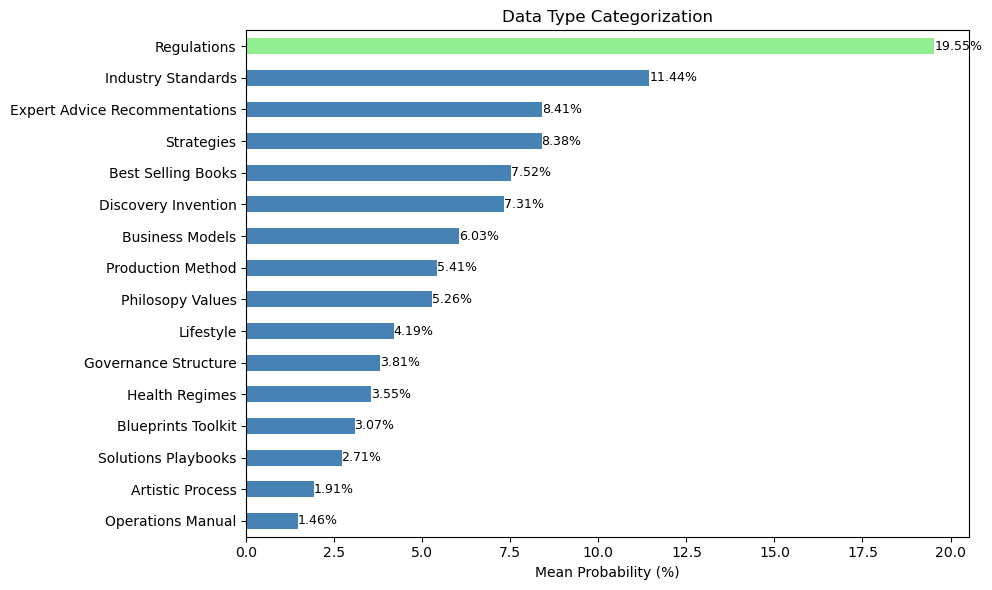

In [89]:
import matplotlib.pyplot as plt

# Calculate the mean probabilities for each category and sort them in descending order
mean_probs = df_cat[category_columns].mean().sort_values(ascending=False)

# Set the color of the highest bar to skyblue and the others to default blue
colors = ['lightgreen' if category == mean_probs.idxmax() else 'steelblue' for category in mean_probs.index]

# Create a horizontal bar chart with data labels
plt.figure(figsize=(10, 6))
mean_probs.plot(kind='barh', color=colors)
plt.title('Data Type Categorization')
plt.xlabel('Mean Probability (%)')
#plt.ylabel('Category')
plt.xticks(rotation=0)
for index, value in enumerate(mean_probs):
    plt.text(value, index, f'{value:.2f}%', ha='left', va='center', fontsize=9)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()